(374, 374)


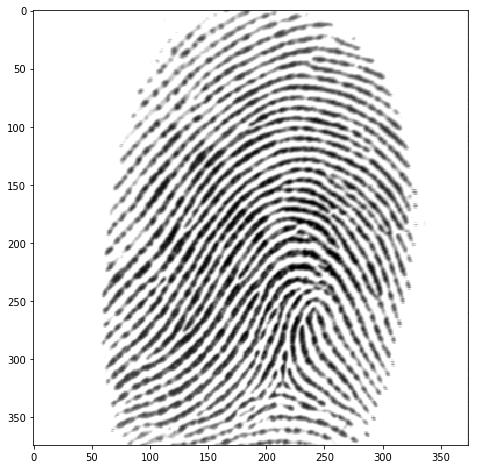

In [48]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import ImageOps, Image

img = Image.open('1_2train.png') #train image
img = np.array(img)
img = img[:,14:388]
image = Image.fromarray(img)
print(img.shape)

plt.figure(figsize=(200,8))
plt.imshow(img,cmap=plt.get_cmap('gray'))

In [23]:
img[:,250]

array([254, 254, 254, 254, 254, 254, 254, 254, 254, 249, 202, 140, 111,
       125, 193, 251, 254, 254, 254, 254, 241, 192, 177, 206, 240, 254,
       254, 254, 254, 254, 252, 214, 169, 138, 149, 193, 241, 254, 254,
       247, 193, 135,  95, 106, 173, 237, 254, 254, 217, 150,  95,  80,
       105, 162, 225, 252, 237, 184, 121,  76,  90, 155, 231, 254, 252,
       221, 164, 103,  76, 104, 178, 240, 254, 254, 254, 222, 159, 114,
       119, 185, 236, 254, 254, 254, 232, 169,  98,  53,  56, 109, 195,
       249, 254, 229, 166,  95,  45,  50, 110, 188, 241, 235, 174,  84,
        37,  58, 128, 208, 254, 254, 254, 221, 184, 186, 220, 248, 254,
       254, 227, 168, 109,  69,  76, 120, 191, 242, 254, 247, 216, 169,
       131, 123, 144, 192, 234, 254, 251, 221, 174, 113,  70,  54,  84,
       149, 217, 250, 254, 254, 254, 235, 194, 124,  58,  49, 103, 177,
       232, 242, 207, 150,  90,  38,  23,  48, 106, 175, 208, 184, 127,
        62,  19,  36, 101, 172, 209, 187, 122,  54,  25,  37,  7

Zero-padding (Add white frame to img)

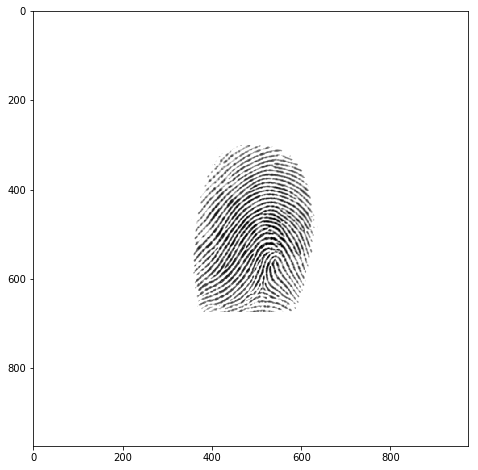

In [49]:
img_with_border = ImageOps.expand(image,border=(300,300),fill=254)
img_border = np.array(img_with_border)
plt.figure(figsize=(150,8))
plt.imshow(img_border,cmap=plt.get_cmap('gray'))

Add noises to the whole image

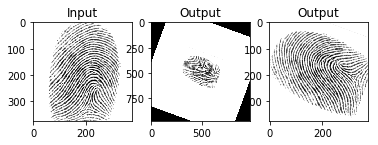

(374, 374)
(974, 974)
(374, 374)


In [50]:
rows,cols = img_border.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),70,1)
dst = cv2.warpAffine(img_border, M, (cols,rows))
cut = dst[300:674,300:674]
cv2.imwrite("rotate70_1.2.png", cut)

plt.subplot(131),plt.imshow(img,cmap=plt.get_cmap('gray')),plt.title('Input')
plt.subplot(132),plt.imshow(dst,cmap=plt.get_cmap('gray')),plt.title('Output')
plt.subplot(133),plt.imshow(cut,cmap=plt.get_cmap('gray')),plt.title('Output')
plt.show()

print(img.shape)
print(dst.shape)
print(cut.shape)

In [45]:
cut[100,:]

array([254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 241, 187, 174, 211, 244, 254, 254, 254, 254, 240, 199, 153,
       124, 125, 175, 231, 253, 254, 253, 216, 151, 107, 100, 127, 186,
       240, 254, 253, 238, 180, 100,  69,  75, 132, 210, 249, 254, 254,
       229, 170, 114,  97, 124, 182, 238, 254, 254, 254, 254, 228, 168,
       113,  85,  92, 139, 202, 243, 254, 254, 238, 182, 109,  59,  46,
        51,  99, 178, 243, 254, 254, 251, 211, 147, 115, 136, 183, 227,
       252, 254, 249, 225, 187, 149, 124, 132, 177, 223, 247, 254, 245,
       216, 162,  98,  46,  25,  46,  95, 168, 225, 252, 243, 193, 115,
        62,  59,  99, 164, 223, 253, 254, 247, 216, 159, 109, 107, 150,
       203, 243, 252, 254, 229, 178, 112,  55,  27,  31,  62, 116, 183,
       241, 254, 254, 254, 223, 161,  88,  45,  49,  82, 135, 194, 235,
       250, 240, 221, 198, 185, 181, 178, 177, 189, 198, 199, 19

In [51]:
def noisy_img(noise_typ, img):
    if noise_typ == 'Gauss':
        mean = 0
        std = 0.4  #tunable constant
        gauss = np.random.normal(mean, std, img.shape)
        noisy_img = img + gauss
        noisy_img = np.clip(noisy_img, 0, 1)
        return noisy_img

    elif noise_typ == 'Poisson':
        vals = len(np.unique(img))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy_img = np.random.poisson(img * vals) / float(vals)
        noisy_img = np.clip(noisy_img, 0, 1)
        return noisy_img
    
    elif noise_typ == 'S&P':
        s_vs_p = 0.5
        amount = 0.004
        noisy_img = np.copy(img)
        # Salt mode
        num_salt = np.ceil(amount * img.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in img.shape]
        noisy_img[coords] = 1
        # Pepper mode
        num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in img.shape]
        noisy_img[coords] = 0
        return out

    elif noise_typ == 'Speckle':
        gauss = np.random.randn(img.shape)
        noisy_img = img + img * gauss
        noisy_img = np.clip(noisy_img, 0, 1)
        return noisy_img

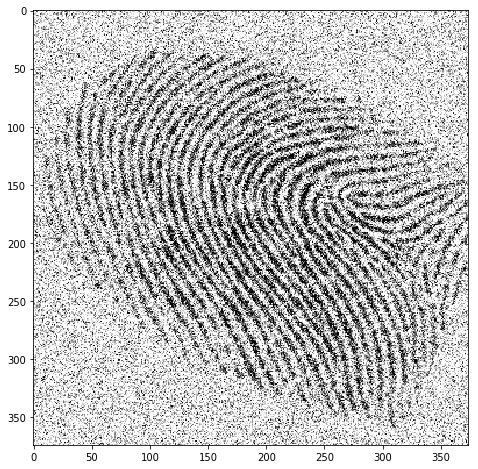

In [52]:
cutST = cut/254
img_Gauss_ST = noisy_img('Gauss',cutST)
img_Gauss = img_Gauss_ST*254 
cv2.imwrite("rotate70&Gauss0.4_1.2.png", img_Gauss)

plt.figure(figsize=(200,8))
plt.imshow(img_Gauss,cmap=plt.get_cmap('gray'))    #This image can be more/less corrupted by increasing/decreasing std value